<a href="https://colab.research.google.com/github/lazybuttrying/AI_Project/blob/main/leaf_segmentation/MaskRCNN/train_maskrcnn_leaf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
!pip install tensorboard==1.15.0 tensorflow==1.15.0 tensorflow-estimator==1.15.1 tensorflow-gpu==1.15.2 tensorflow-gpu-estimator==2.1.0 Keras==2.2.5 Keras-Applications==1.0.8 Keras-Preprocessing==1.1.0
!pip uninstall h5py -y
!pip install h5py==2.10.0  
!pip install -U scikit-image==0.16.2

     |████████████████████████████████| 3.8 MB 15.3 MB/s 
     |████████████████████████████████| 412.3 MB 26 kB/s 
     |████████████████████████████████| 503 kB 71.0 MB/s 
     |████████████████████████████████| 410.9 MB 36 kB/s 
     |████████████████████████████████| 464 kB 68.9 MB/s 
     |████████████████████████████████| 336 kB 74.1 MB/s 
     |████████████████████████████████| 50 kB 8.9 MB/s 
     |████████████████████████████████| 41 kB 846 kB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=5d0cb4c0ce82113ff74e370ad9ade30c2954c5946f4193e93c44775ce9185b47
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing i

In [3]:
cd /gdrive/My Drive/AI/maskrcnn

/gdrive/My Drive/AI/maskrcnn


In [4]:
#!git clone https://github.com/matterport/Mask_RCNN.git 

In [5]:
cd Mask_RCNN

/gdrive/My Drive/AI/maskrcnn/Mask_RCNN


In [6]:
!python setup.py install

/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'license-file' will not be supported in future versions. Please use the underscore name 'license_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'requirements-file' will not be supported in future versions. Please use the underscore name 'requirements_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
reading manifest template 'MANIFEST.in'
adding licens

In [ ]:
!nvidia-smi

Sat Jan 15 06:12:02 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Demo.ipynb

In [ ]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("./")
print(ROOT_DIR)
# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(ROOT_DIR+"/samples/coco/")
import coco
%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
print(COCO_MODEL_PATH)
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")


/gdrive/My Drive/AI/maskrcnn/Mask_RCNN


Using TensorFlow backend.


/gdrive/My Drive/AI/maskrcnn/Mask_RCNN/mask_rcnn_coco.h5


In [ ]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()



Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [ ]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)









Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [ ]:
# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)


In [ ]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush','leaf']


In [ ]:
cd gdrive/My Drive/AI/maskrcnn/images/

[Errno 2] No such file or directory: 'gdrive/My Drive/AI/maskrcnn/images/'
/gdrive/My Drive/AI/maskrcnn/Mask_RCNN



## 아래 경로에 테스트할 이미지 저장하기!!

In [ ]:
IMAGE_DIR ='/gdrive/My Drive/AI/maskrcnn/Mask_RCNN/images/test/'
IMAGE_DIR

'/gdrive/My Drive/AI/maskrcnn/Mask_RCNN/images/test/'

Processing 1 images
image                    shape: (453, 680, 3)         min:    0.00000  max:  250.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  142.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


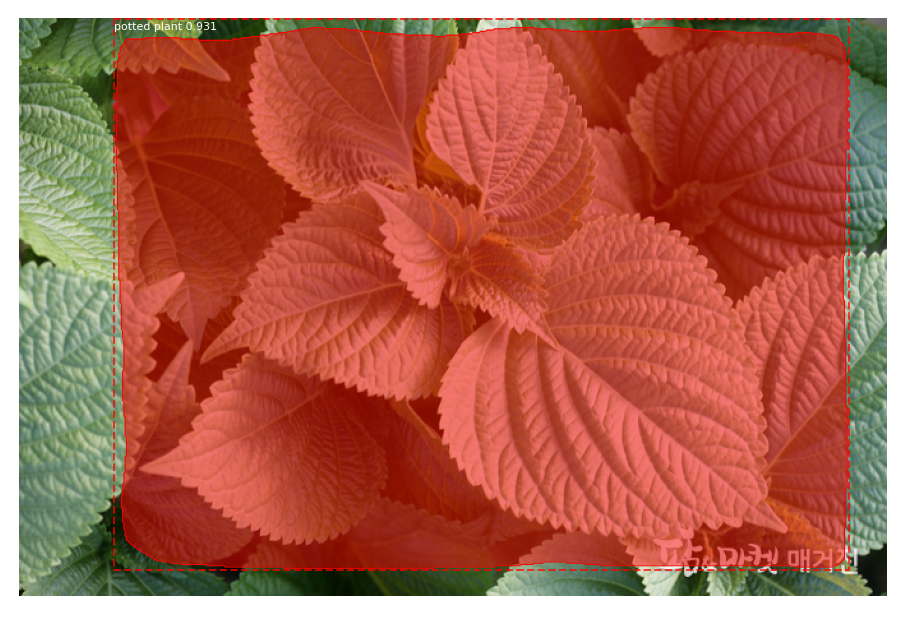

In [ ]:

# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])


# leaf.py 파일을 수정하면서 조정 중

경로 : /Mask_RCNN/sampels/leaf/leaf.py

In [ ]:
ls

assets/   dist/        mask_rcnn_coco.h5    requirements.txt
build/    images/      mask_rcnn.egg-info/  samples/
cocoapi/  LICENSE      mrcnn/               setup.cfg
dataset/  MANIFEST.in  README.md            setup.py


In [ ]:
cp /gdrive/MyDrive/AI/maskrcnn/training/train/*rgb.png /gdrive/MyDrive/AI/maskrcnn/Mask_RCNN/leaf_dataset/train

In [ ]:
cp /gdrive/MyDrive/AI/maskrcnn/training/A2/*rgb.png /gdrive/MyDrive/AI/maskrcnn/Mask_RCNN/leaf_dataset/val

In [ ]:
import os

rootdir = '/gdrive/MyDrive/AI/maskrcnn/Mask_RCNN/leaf_dataset/train/'
for fname in os.listdir(rootdir):
  old = rootdir + fname
  fff = fname.split('_')
  new = rootdir + fff[0] + '_rgb.png'
  #print(new)
  os.rename(old, new)

In [ ]:
import os

rootdir = '/gdrive/MyDrive/AI/maskrcnn/Mask_RCNN/leaf_dataset/val/'
for fname in os.listdir(rootdir):
  old = rootdir + fname
  fff = fname.split('_')
  new = rootdir + fff[0] + '_rgb.png'
  #print(new)
  os.rename(old, new)

In [ ]:
ls

assets/   leaf_dataset/        mrcnn/            splash_20220114T155650.png
build/    LICENSE              README.md         splash_20220114T160109.png
cocoapi/  logs/                requirements.txt  splash_20220114T163811.png
dataset/  MANIFEST.in          samples/          splash_20220114T164006.png
dist/     mask_rcnn_coco.h5    setup.cfg         splash_20220114T164436.png
images/   mask_rcnn.egg-info/  setup.py


In [ ]:
# weight를 imagenet으로 하면 안 좋다
!python3 samples/leaf/leaf.py train --epoch 5 --dataset=./leaf_dataset --weights=coco

Using TensorFlow backend.
Weights:  coco
Dataset:  ./leaf_dataset
Logs:  /gdrive/My Drive/AI/logs

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mr

In [ ]:
!python3 samples/leaf/leaf.py train --epoch 5 --dataset=./leaf_dataset --weights=last

In [ ]:
ls

In [12]:
# tester 이미지는 무조건 jpg로만 해야한다! 저장은 png로 되는 매-직
!python3 samples/leaf/leaf.py splash --image=./leaf_dataset/tester/plant001_label.jpg --weights=last


Using TensorFlow backend.
Weights:  last
Dataset:  None
Logs:  /gdrive/My Drive/AI/logs

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_l

# 이하 기타 - 봐도 몰라

In [ ]:
ls

leaf.py


In [ ]:
cd ../../

/gdrive/MyDrive/AI/maskrcnn/Mask_RCNN


In [ ]:
!python3 samples/balloon/balloon.py train --dataset=dataset --weights=coco

Using TensorFlow backend.
Weights:  coco
Dataset:  dataset
Logs:  /gdrive/MyDrive/AI/logs

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox

In [ ]:
!python3 samples/balloon/balloon.py splash --weights=last --image=/gdrive/MyDrive/AI/maskrcnn/Mask_RCNN/dataset/train/10464445726_6f1e3bbe6a_k.jpg

Using TensorFlow backend.
Weights:  last
Dataset:  None
Logs:  /gdrive/My Drive/AI/logs

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_l

Using TensorFlow backend.
Weights:  /gdrive/MyDrive/AI/maskrcnn/Mask_RCNN/logs/leaf20220114T1503/mask_rcnn_leaf_0001.h5
Dataset:  None
Logs:  /gdrive/My Drive/AI/logs

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn

In [ ]:
!python3 samples/coco/coco.py evaluate --dataset=../../leaf_dataset --model=/gdrive/MyDrive/AI/maskrcnn/Mask_RCNN/logs/leaf20220114T1503/mask_rcnn_leaf_0001.h5


Using TensorFlow backend.
Command:  evaluate
Model:  /gdrive/MyDrive/AI/maskrcnn/Mask_RCNN/logs/leaf20220114T1503/mask_rcnn_leaf_0001.h5
Dataset:  ../../leaf_dataset
Year:  2014
Logs:  /gdrive/My Drive/AI/logs
Auto Download:  False

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_R

In [ ]:
import os
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon

# Root directory of the project
ROOT_DIR = os.path.abspath("./")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

sys.path.append(ROOT_DIR+"/samples/balloon/")
import balloon

%matplotlib inline 

In [ ]:
config = balloon.BalloonConfig()
BALLOON_DIR = os.path.join(ROOT_DIR, "datasets/balloon")

In [ ]:
# Load dataset
# Get the dataset from the releases page
# https://github.com/matterport/Mask_RCNN/releases
dataset = balloon.BalloonDataset()
dataset.load_balloon(BALLOON_DIR, "train")

# Must call before using the dataset
dataset.prepare()

print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

FileNotFoundError: ignored

## train_shapes.ipynb

In [ ]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
print(COCO_MODEL_PATH)
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

/gdrive/My Drive/AI/mask_rcnn_coco.h5
... done downloading pretrained model!


In [ ]:
class ShapesConfig(Config):
    """Configuration for training on the toy shapes dataset.
    Derives from the base Config class and overrides values specific
    to the toy shapes dataset.
    """
    # Give the configuration a recognizable name
    NAME = "shapes"

    # Train on 1 GPU and 8 images per GPU. We can put multiple images on each
    # GPU because the images are small. Batch size is 8 (GPUs * images/GPU).
    GPU_COUNT = 1
    IMAGES_PER_GPU = 8

    # Number of classes (including background)
    NUM_CLASSES = 1 + 3  # background + 3 shapes

    # Use small images for faster training. Set the limits of the small side
    # the large side, and that determines the image shape.
    IMAGE_MIN_DIM = 128
    IMAGE_MAX_DIM = 128

    # Use smaller anchors because our image and objects are small
    RPN_ANCHOR_SCALES = (8, 16, 32, 64, 128)  # anchor side in pixels

    # Reduce training ROIs per image because the images are small and have
    # few objects. Aim to allow ROI sampling to pick 33% positive ROIs.
    TRAIN_ROIS_PER_IMAGE = 32

    # Use a small epoch since the data is simple
    STEPS_PER_EPOCH = 100

    # use small validation steps since the epoch is small
    VALIDATION_STEPS = 5
    
config = ShapesConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     8
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 8
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  128
IMAGE_META_SIZE                16
IMAGE_MIN_DIM                  128
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [128 128   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE             

In [ ]:
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax


### Dataset

In [ ]:
class LeafDataset(utils.Dataset):
  def load_balloons(self, dataset_dir, subset): # read JSON 


  #  generates bitmap masks for every object in the image by drawing the polygons.
  def load_mask(self, image_id): 
  
  #  simply returns a string that identifies the image for debugging purposes. 
  # Here it simply returns the path of the image file.
  def image_reference(self, image_id):


In [ ]:
class ShapesDataset(utils.Dataset):
    """Generates the shapes synthetic dataset. The dataset consists of simple
    shapes (triangles, squares, circles) placed randomly on a blank surface.
    The images are generated on the fly. No file access required.
    """

    def load_shapes(self, count, height, width):
        """Generate the requested number of synthetic images.
        count: number of images to generate.
        height, width: the size of the generated images.
        """
        # Add classes
        self.add_class("shapes", 1, "square")
        self.add_class("shapes", 2, "circle")
        self.add_class("shapes", 3, "triangle")

        # Add images
        # Generate random specifications of images (i.e. color and
        # list of shapes sizes and locations). This is more compact than
        # actual images. Images are generated on the fly in load_image().
        for i in range(count):
            bg_color, shapes = self.random_image(height, width)
            self.add_image("shapes", image_id=i, path=None,
                           width=width, height=height,
                           bg_color=bg_color, shapes=shapes)

    def load_image(self, image_id):
        """Generate an image from the specs of the given image ID.
        Typically this function loads the image from a file, but
        in this case it generates the image on the fly from the
        specs in image_info.
        """
        info = self.image_info[image_id]
        bg_color = np.array(info['bg_color']).reshape([1, 1, 3])
        image = np.ones([info['height'], info['width'], 3], dtype=np.uint8)
        image = image * bg_color.astype(np.uint8)
        for shape, color, dims in info['shapes']:
            image = self.draw_shape(image, shape, dims, color)
        return image

    def image_reference(self, image_id):
        """Return the shapes data of the image."""
        info = self.image_info[image_id]
        if info["source"] == "shapes":
            return info["shapes"]
        else:
            super(self.__class__).image_reference(self, image_id)

    def load_mask(self, image_id):
        """Generate instance masks for shapes of the given image ID.
        """
        info = self.image_info[image_id]
        shapes = info['shapes']
        count = len(shapes)
        mask = np.zeros([info['height'], info['width'], count], dtype=np.uint8)
        for i, (shape, _, dims) in enumerate(info['shapes']):
            mask[:, :, i:i+1] = self.draw_shape(mask[:, :, i:i+1].copy(),
                                                shape, dims, 1)
        # Handle occlusions
        occlusion = np.logical_not(mask[:, :, -1]).astype(np.uint8)
        for i in range(count-2, -1, -1):
            mask[:, :, i] = mask[:, :, i] * occlusion
            occlusion = np.logical_and(occlusion, np.logical_not(mask[:, :, i]))
        # Map class names to class IDs.
        class_ids = np.array([self.class_names.index(s[0]) for s in shapes])
        return mask.astype(np.bool), class_ids.astype(np.int32)

    def draw_shape(self, image, shape, dims, color):
        """Draws a shape from the given specs."""
        # Get the center x, y and the size s
        x, y, s = dims
        if shape == 'square':
            cv2.rectangle(image, (x-s, y-s), (x+s, y+s), color, -1)
        elif shape == "circle":
            cv2.circle(image, (x, y), s, color, -1)
        elif shape == "triangle":
            points = np.array([[(x, y-s),
                                (x-s/math.sin(math.radians(60)), y+s),
                                (x+s/math.sin(math.radians(60)), y+s),
                                ]], dtype=np.int32)
            cv2.fillPoly(image, points, color)
        return image

    def random_shape(self, height, width):
        """Generates specifications of a random shape that lies within
        the given height and width boundaries.
        Returns a tuple of three valus:
        * The shape name (square, circle, ...)
        * Shape color: a tuple of 3 values, RGB.
        * Shape dimensions: A tuple of values that define the shape size
                            and location. Differs per shape type.
        """
        # Shape
        shape = random.choice(["square", "circle", "triangle"])
        # Color
        color = tuple([random.randint(0, 255) for _ in range(3)])
        # Center x, y
        buffer = 20
        y = random.randint(buffer, height - buffer - 1)
        x = random.randint(buffer, width - buffer - 1)
        # Size
        s = random.randint(buffer, height//4)
        return shape, color, (x, y, s)

    def random_image(self, height, width):
        """Creates random specifications of an image with multiple shapes.
        Returns the background color of the image and a list of shape
        specifications that can be used to draw the image.
        """
        # Pick random background color
        bg_color = np.array([random.randint(0, 255) for _ in range(3)])
        # Generate a few random shapes and record their
        # bounding boxes
        shapes = []
        boxes = []
        N = random.randint(1, 4)
        for _ in range(N):
            shape, color, dims = self.random_shape(height, width)
            shapes.append((shape, color, dims))
            x, y, s = dims
            boxes.append([y-s, x-s, y+s, x+s])
        # Apply non-max suppression wit 0.3 threshold to avoid
        # shapes covering each other
        keep_ixs = utils.non_max_suppression(np.array(boxes), np.arange(N), 0.3)
        shapes = [s for i, s in enumerate(shapes) if i in keep_ixs]
        return bg_color, shapes

In [ ]:
# Training dataset
dataset_train = ShapesDataset()
dataset_train.load_shapes(500, config.IMAGE_SHAPE[0], config.IMAGE_SHAPE[1])
dataset_train.prepare()

# Validation dataset
dataset_val = ShapesDataset()
dataset_val.load_shapes(50, config.IMAGE_SHAPE[0], config.IMAGE_SHAPE[1])
dataset_val.prepare()


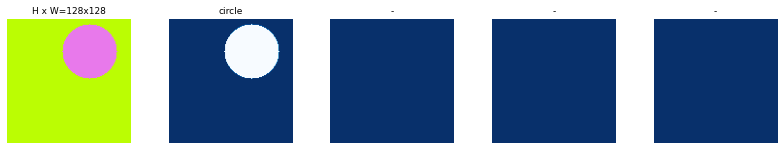

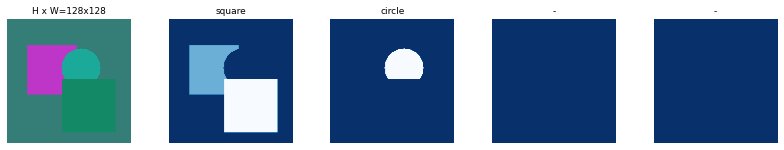

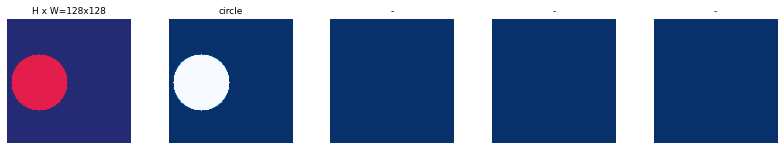

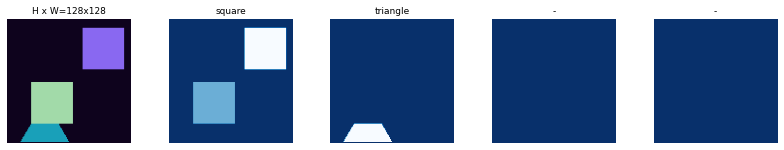

In [ ]:
# Load and display random samples
image_ids = np.random.choice(dataset_train.image_ids, 4)
for image_id in image_ids:
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

In [ ]:
"""
Mask R-CNN
Configurations and data loading code for MS COCO.

Copyright (c) 2017 Matterport, Inc.
Licensed under the MIT License (see LICENSE for details)
Written by Waleed Abdulla

------------------------------------------------------------

Usage: import the module (see Jupyter notebooks for examples), or run from
       the command line as such:

    # Train a new model starting from pre-trained COCO weights
    python3 coco.py train --dataset=/path/to/coco/ --model=coco

    # Train a new model starting from ImageNet weights. Also auto download COCO dataset
    python3 coco.py train --dataset=/path/to/coco/ --model=imagenet --download=True

    # Continue training a model that you had trained earlier
    python3 coco.py train --dataset=/path/to/coco/ --model=/path/to/weights.h5

    # Continue training the last model you trained
    python3 coco.py train --dataset=/path/to/coco/ --model=last

    # Run COCO evaluatoin on the last model you trained
    python3 coco.py evaluate --dataset=/path/to/coco/ --model=last
"""

import os
import sys
import time
import numpy as np
import imgaug  # https://github.com/aleju/imgaug (pip3 install imgaug)

# Download and install the Python COCO tools from https://github.com/waleedka/coco
# That's a fork from the original https://github.com/pdollar/coco with a bug
# fix for Python 3.
# I submitted a pull request https://github.com/cocodataset/cocoapi/pull/50
# If the PR is merged then use the original repo.
# Note: Edit PythonAPI/Makefile and replace "python" with "python3".
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
from pycocotools import mask as maskUtils

import zipfile
import urllib.request
import shutil

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.config import Config
from mrcnn import model as modellib, utils

# Path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

# Directory to save logs and model checkpoints, if not provided
# through the command line argument --logs
DEFAULT_LOGS_DIR = os.path.join(ROOT_DIR, "logs")
DEFAULT_DATASET_YEAR = "2014"

############################################################
#  Configurations
############################################################


class CocoConfig(Config):
    """Configuration for training on MS COCO.
    Derives from the base Config class and overrides values specific
    to the COCO dataset.
    """
    # Give the configuration a recognizable name
    NAME = "coco"

    # We use a GPU with 12GB memory, which can fit two images.
    # Adjust down if you use a smaller GPU.
    IMAGES_PER_GPU = 2

    # Uncomment to train on 8 GPUs (default is 1)
    # GPU_COUNT = 8

    # Number of classes (including background)
    NUM_CLASSES = 1 + 80  # COCO has 80 classes


############################################################
#  Dataset
############################################################

class CocoDataset(utils.Dataset):
    def load_coco(self, dataset_dir, subset, year=DEFAULT_DATASET_YEAR, class_ids=None,
                  class_map=None, return_coco=False, auto_download=False):
        """Load a subset of the COCO dataset.
        dataset_dir: The root directory of the COCO dataset.
        subset: What to load (train, val, minival, valminusminival)
        year: What dataset year to load (2014, 2017) as a string, not an integer
        class_ids: If provided, only loads images that have the given classes.
        class_map: TODO: Not implemented yet. Supports maping classes from
            different datasets to the same class ID.
        return_coco: If True, returns the COCO object.
        auto_download: Automatically download and unzip MS-COCO images and annotations
        """

        if auto_download is True:
            self.auto_download(dataset_dir, subset, year)

        coco = COCO("{}/annotations/instances_{}{}.json".format(dataset_dir, subset, year))
        if subset == "minival" or subset == "valminusminival":
            subset = "val"
        image_dir = "{}/{}{}".format(dataset_dir, subset, year)

        # Load all classes or a subset?
        if not class_ids:
            # All classes
            class_ids = sorted(coco.getCatIds())

        # All images or a subset?
        if class_ids:
            image_ids = []
            for id in class_ids:
                image_ids.extend(list(coco.getImgIds(catIds=[id])))
            # Remove duplicates
            image_ids = list(set(image_ids))
        else:
            # All images
            image_ids = list(coco.imgs.keys())

        # Add classes
        for i in class_ids:
            self.add_class("coco", i, coco.loadCats(i)[0]["name"])

        # Add images
        for i in image_ids:
            self.add_image(
                "coco", image_id=i,
                path=os.path.join(image_dir, coco.imgs[i]['file_name']),
                width=coco.imgs[i]["width"],
                height=coco.imgs[i]["height"],
                annotations=coco.loadAnns(coco.getAnnIds(
                    imgIds=[i], catIds=class_ids, iscrowd=None)))
        if return_coco:
            return coco

    def auto_download(self, dataDir, dataType, dataYear):
        """Download the COCO dataset/annotations if requested.
        dataDir: The root directory of the COCO dataset.
        dataType: What to load (train, val, minival, valminusminival)
        dataYear: What dataset year to load (2014, 2017) as a string, not an integer
        Note:
            For 2014, use "train", "val", "minival", or "valminusminival"
            For 2017, only "train" and "val" annotations are available
        """

        # Setup paths and file names
        if dataType == "minival" or dataType == "valminusminival":
            imgDir = "{}/{}{}".format(dataDir, "val", dataYear)
            imgZipFile = "{}/{}{}.zip".format(dataDir, "val", dataYear)
            imgURL = "http://images.cocodataset.org/zips/{}{}.zip".format("val", dataYear)
        else:
            imgDir = "{}/{}{}".format(dataDir, dataType, dataYear)
            imgZipFile = "{}/{}{}.zip".format(dataDir, dataType, dataYear)
            imgURL = "http://images.cocodataset.org/zips/{}{}.zip".format(dataType, dataYear)
        # print("Image paths:"); print(imgDir); print(imgZipFile); print(imgURL)

        # Create main folder if it doesn't exist yet
        if not os.path.exists(dataDir):
            os.makedirs(dataDir)

        # Download images if not available locally
        if not os.path.exists(imgDir):
            os.makedirs(imgDir)
            print("Downloading images to " + imgZipFile + " ...")
            with urllib.request.urlopen(imgURL) as resp, open(imgZipFile, 'wb') as out:
                shutil.copyfileobj(resp, out)
            print("... done downloading.")
            print("Unzipping " + imgZipFile)
            with zipfile.ZipFile(imgZipFile, "r") as zip_ref:
                zip_ref.extractall(dataDir)
            print("... done unzipping")
        print("Will use images in " + imgDir)

        # Setup annotations data paths
        annDir = "{}/annotations".format(dataDir)
        if dataType == "minival":
            annZipFile = "{}/instances_minival2014.json.zip".format(dataDir)
            annFile = "{}/instances_minival2014.json".format(annDir)
            annURL = "https://dl.dropboxusercontent.com/s/o43o90bna78omob/instances_minival2014.json.zip?dl=0"
            unZipDir = annDir
        elif dataType == "valminusminival":
            annZipFile = "{}/instances_valminusminival2014.json.zip".format(dataDir)
            annFile = "{}/instances_valminusminival2014.json".format(annDir)
            annURL = "https://dl.dropboxusercontent.com/s/s3tw5zcg7395368/instances_valminusminival2014.json.zip?dl=0"
            unZipDir = annDir
        else:
            annZipFile = "{}/annotations_trainval{}.zip".format(dataDir, dataYear)
            annFile = "{}/instances_{}{}.json".format(annDir, dataType, dataYear)
            annURL = "http://images.cocodataset.org/annotations/annotations_trainval{}.zip".format(dataYear)
            unZipDir = dataDir
        # print("Annotations paths:"); print(annDir); print(annFile); print(annZipFile); print(annURL)

        # Download annotations if not available locally
        if not os.path.exists(annDir):
            os.makedirs(annDir)
        if not os.path.exists(annFile):
            if not os.path.exists(annZipFile):
                print("Downloading zipped annotations to " + annZipFile + " ...")
                with urllib.request.urlopen(annURL) as resp, open(annZipFile, 'wb') as out:
                    shutil.copyfileobj(resp, out)
                print("... done downloading.")
            print("Unzipping " + annZipFile)
            with zipfile.ZipFile(annZipFile, "r") as zip_ref:
                zip_ref.extractall(unZipDir)
            print("... done unzipping")
        print("Will use annotations in " + annFile)

    def load_mask(self, image_id):
        """Load instance masks for the given image.

        Different datasets use different ways to store masks. This
        function converts the different mask format to one format
        in the form of a bitmap [height, width, instances].

        Returns:
        masks: A bool array of shape [height, width, instance count] with
            one mask per instance.
        class_ids: a 1D array of class IDs of the instance masks.
        """
        # If not a COCO image, delegate to parent class.
        image_info = self.image_info[image_id]
        if image_info["source"] != "coco":
            return super(CocoDataset, self).load_mask(image_id)

        instance_masks = []
        class_ids = []
        annotations = self.image_info[image_id]["annotations"]
        # Build mask of shape [height, width, instance_count] and list
        # of class IDs that correspond to each channel of the mask.
        for annotation in annotations:
            class_id = self.map_source_class_id(
                "coco.{}".format(annotation['category_id']))
            if class_id:
                m = self.annToMask(annotation, image_info["height"],
                                   image_info["width"])
                # Some objects are so small that they're less than 1 pixel area
                # and end up rounded out. Skip those objects.
                if m.max() < 1:
                    continue
                # Is it a crowd? If so, use a negative class ID.
                if annotation['iscrowd']:
                    # Use negative class ID for crowds
                    class_id *= -1
                    # For crowd masks, annToMask() sometimes returns a mask
                    # smaller than the given dimensions. If so, resize it.
                    if m.shape[0] != image_info["height"] or m.shape[1] != image_info["width"]:
                        m = np.ones([image_info["height"], image_info["width"]], dtype=bool)
                instance_masks.append(m)
                class_ids.append(class_id)

        # Pack instance masks into an array
        if class_ids:
            mask = np.stack(instance_masks, axis=2).astype(np.bool)
            class_ids = np.array(class_ids, dtype=np.int32)
            return mask, class_ids
        else:
            # Call super class to return an empty mask
            return super(CocoDataset, self).load_mask(image_id)

    def image_reference(self, image_id):
        """Return a link to the image in the COCO Website."""
        info = self.image_info[image_id]
        if info["source"] == "coco":
            return "http://cocodataset.org/#explore?id={}".format(info["id"])
        else:
            super(CocoDataset, self).image_reference(image_id)

    # The following two functions are from pycocotools with a few changes.

    def annToRLE(self, ann, height, width):
        """
        Convert annotation which can be polygons, uncompressed RLE to RLE.
        :return: binary mask (numpy 2D array)
        """
        segm = ann['segmentation']
        if isinstance(segm, list):
            # polygon -- a single object might consist of multiple parts
            # we merge all parts into one mask rle code
            rles = maskUtils.frPyObjects(segm, height, width)
            rle = maskUtils.merge(rles)
        elif isinstance(segm['counts'], list):
            # uncompressed RLE
            rle = maskUtils.frPyObjects(segm, height, width)
        else:
            # rle
            rle = ann['segmentation']
        return rle

    def annToMask(self, ann, height, width):
        """
        Convert annotation which can be polygons, uncompressed RLE, or RLE to binary mask.
        :return: binary mask (numpy 2D array)
        """
        rle = self.annToRLE(ann, height, width)
        m = maskUtils.decode(rle)
        return m


############################################################
#  COCO Evaluation
############################################################

def build_coco_results(dataset, image_ids, rois, class_ids, scores, masks):
    """Arrange resutls to match COCO specs in http://cocodataset.org/#format
    """
    # If no results, return an empty list
    if rois is None:
        return []

    results = []
    for image_id in image_ids:
        # Loop through detections
        for i in range(rois.shape[0]):
            class_id = class_ids[i]
            score = scores[i]
            bbox = np.around(rois[i], 1)
            mask = masks[:, :, i]

            result = {
                "image_id": image_id,
                "category_id": dataset.get_source_class_id(class_id, "coco"),
                "bbox": [bbox[1], bbox[0], bbox[3] - bbox[1], bbox[2] - bbox[0]],
                "score": score,
                "segmentation": maskUtils.encode(np.asfortranarray(mask))
            }
            results.append(result)
    return results


def evaluate_coco(model, dataset, coco, eval_type="bbox", limit=0, image_ids=None):
    """Runs official COCO evaluation.
    dataset: A Dataset object with valiadtion data
    eval_type: "bbox" or "segm" for bounding box or segmentation evaluation
    limit: if not 0, it's the number of images to use for evaluation
    """
    # Pick COCO images from the dataset
    image_ids = image_ids or dataset.image_ids

    # Limit to a subset
    if limit:
        image_ids = image_ids[:limit]

    # Get corresponding COCO image IDs.
    coco_image_ids = [dataset.image_info[id]["id"] for id in image_ids]

    t_prediction = 0
    t_start = time.time()

    results = []
    for i, image_id in enumerate(image_ids):
        # Load image
        image = dataset.load_image(image_id)

        # Run detection
        t = time.time()
        r = model.detect([image], verbose=0)[0]
        t_prediction += (time.time() - t)

        # Convert results to COCO format
        # Cast masks to uint8 because COCO tools errors out on bool
        image_results = build_coco_results(dataset, coco_image_ids[i:i + 1],
                                           r["rois"], r["class_ids"],
                                           r["scores"],
                                           r["masks"].astype(np.uint8))
        results.extend(image_results)

    # Load results. This modifies results with additional attributes.
    coco_results = coco.loadRes(results)

    # Evaluate
    cocoEval = COCOeval(coco, coco_results, eval_type)
    cocoEval.params.imgIds = coco_image_ids
    cocoEval.evaluate()
    cocoEval.accumulate()
    cocoEval.summarize()

    print("Prediction time: {}. Average {}/image".format(
        t_prediction, t_prediction / len(image_ids)))
    print("Total time: ", time.time() - t_start)


############################################################
#  Training
############################################################


if __name__ == '__main__':
    import argparse

    # Parse command line arguments
    parser = argparse.ArgumentParser(
        description='Train Mask R-CNN on MS COCO.')
    parser.add_argument("command",
                        metavar="<command>",
                        help="'train' or 'evaluate' on MS COCO")
    parser.add_argument('--dataset', required=True,
                        metavar="/path/to/coco/",
                        help='Directory of the MS-COCO dataset')
    parser.add_argument('--year', required=False,
                        default=DEFAULT_DATASET_YEAR,
                        metavar="<year>",
                        help='Year of the MS-COCO dataset (2014 or 2017) (default=2014)')
    parser.add_argument('--model', required=True,
                        metavar="/path/to/weights.h5",
                        help="Path to weights .h5 file or 'coco'")
    parser.add_argument('--logs', required=False,
                        default=DEFAULT_LOGS_DIR,
                        metavar="/path/to/logs/",
                        help='Logs and checkpoints directory (default=logs/)')
    parser.add_argument('--limit', required=False,
                        default=500,
                        metavar="<image count>",
                        help='Images to use for evaluation (default=500)')
    parser.add_argument('--download', required=False,
                        default=False,
                        metavar="<True|False>",
                        help='Automatically download and unzip MS-COCO files (default=False)',
                        type=bool)
    args = parser.parse_args()
    print("Command: ", args.command)
    print("Model: ", args.model)
    print("Dataset: ", args.dataset)
    print("Year: ", args.year)
    print("Logs: ", args.logs)
    print("Auto Download: ", args.download)

    # Configurations
    if args.command == "train":
        config = CocoConfig()
    else:
        class InferenceConfig(CocoConfig):
            # Set batch size to 1 since we'll be running inference on
            # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
            GPU_COUNT = 1
            IMAGES_PER_GPU = 1
            DETECTION_MIN_CONFIDENCE = 0
        config = InferenceConfig()
    config.display()

    # Create model
    if args.command == "train":
        model = modellib.MaskRCNN(mode="training", config=config,
                                  model_dir=args.logs)
    else:
        model = modellib.MaskRCNN(mode="inference", config=config,
                                  model_dir=args.logs)

    # Select weights file to load
    if args.model.lower() == "coco":
        model_path = COCO_MODEL_PATH
    elif args.model.lower() == "last":
        # Find last trained weights
        model_path = model.find_last()
    elif args.model.lower() == "imagenet":
        # Start from ImageNet trained weights
        model_path = model.get_imagenet_weights()
    else:
        model_path = args.model

    # Load weights
    print("Loading weights ", model_path)
    model.load_weights(model_path, by_name=True)

    # Train or evaluate
    if args.command == "train":
        # Training dataset. Use the training set and 35K from the
        # validation set, as as in the Mask RCNN paper.
        dataset_train = CocoDataset()
        dataset_train.load_coco(args.dataset, "train", year=args.year, auto_download=args.download)
        if args.year in '2014':
            dataset_train.load_coco(args.dataset, "valminusminival", year=args.year, auto_download=args.download)
        dataset_train.prepare()

        # Validation dataset
        dataset_val = CocoDataset()
        val_type = "val" if args.year in '2017' else "minival"
        dataset_val.load_coco(args.dataset, val_type, year=args.year, auto_download=args.download)
        dataset_val.prepare()

        # Image Augmentation
        # Right/Left flip 50% of the time
        augmentation = imgaug.augmenters.Fliplr(0.5)

        # *** This training schedule is an example. Update to your needs ***

        # Training - Stage 1
        print("Training network heads")
        model.train(dataset_train, dataset_val,
                    learning_rate=config.LEARNING_RATE,
                    epochs=40,
                    layers='heads',
                    augmentation=augmentation)

        # Training - Stage 2
        # Finetune layers from ResNet stage 4 and up
        print("Fine tune Resnet stage 4 and up")
        model.train(dataset_train, dataset_val,
                    learning_rate=config.LEARNING_RATE,
                    epochs=120,
                    layers='4+',
                    augmentation=augmentation)

        # Training - Stage 3
        # Fine tune all layers
        print("Fine tune all layers")
        model.train(dataset_train, dataset_val,
                    learning_rate=config.LEARNING_RATE / 10,
                    epochs=160,
                    layers='all',
                    augmentation=augmentation)

    elif args.command == "evaluate":
        # Validation dataset
        dataset_val = CocoDataset()
        val_type = "val" if args.year in '2017' else "minival"
        coco = dataset_val.load_coco(args.dataset, val_type, year=args.year, return_coco=True, auto_download=args.download)
        dataset_val.prepare()
        print("Running COCO evaluation on {} images.".format(args.limit))
        evaluate_coco(model, dataset_val, coco, "bbox", limit=int(args.limit))
    else:
        print("'{}' is not recognized. "
              "Use 'train' or 'evaluate'".format(args.command))
